# Quistorff Water System
-----------------------------------
## S05 Well Pump Sizing
*Ryan Haseman: 5-14-2019*



Purpose: 
Capital Improvement Project to install VFD to controll well pump at Swede Hill \#1. Current installation is problematic and frequently trips out.

In [1]:
from Water import Pipe, Pump, tools

In [2]:
# maximum daily demand
Q_target = 80   # gpm
print('Target Flow =', round(Q_target,2), 'gpm')

Target Flow = 80 gpm


In [3]:
# elevations
SWL = 135   # ft from top of well casing
hiLot_elevation = 320     # ft
wellhead_elevation = 287  # ft

# desired pressure at highest lot
hiLot_pressure = tools.psi2ft(psi=45)   # ft of head

In [4]:
specific_capacity = 0.1538 # ft/gpm
PWL = SWL + Q_target * specific_capacity   # ft from top of well casing
print('Pumping Water level (PWL) =', round(PWL,2), 'ft bgs')

Pumping Water level (PWL) = 147.3 ft bgs


### Losses

In [5]:
# pump to wellhead
riser_length = 168  # ft
pipe_pmp2wh = Pipe(length=riser_length, size=2, kind='GALVANIZED PIPE', sch=40)
pipe_pmp2wh.fitting('valve', 'column_check', qty=1, Kvalue=3)

# wellhead to distribution
pipe_wh2dist = Pipe(length=108, size=3, kind='GALVANIZED PIPE', sch=40)
pipe_wh2dist.fitting('tee_branch', 'standard_threaded', qty=2)
pipe_wh2dist.fitting('elbow_90', 'standard_threaded', qty=1)
pipe_wh2dist.fitting('flowmeter', 'turbine', qty=1, Kvalue=.1)
pipe_wh2dist.fitting('tee_through', 'standard_threaded', qty=3)
pipe_wh2dist.fitting('valve', 'gate', qty=1)

# distribution to mainlnie
pipe_dist2ml = Pipe(length=200, size=2.5, kind='PVC', sch=40)
pipe_dist2ml.fitting('tee_branch', 'standard_glued', qty=1)
pipe_dist2ml.fitting('elbow_90', 'standard_glued', qty=1)
pipe_dist2ml.fitting('valve', 'gate', qty=1)

# mainline to hilot
pipe_ml2hilot = Pipe(length=2500, size=8, kind='PVC', sch='C900 DR-18')
pipe_ml2hilot.fitting('valve', 'gate', qty=1)

In [6]:
# calculating discharge side losses
discharge_losses = pipe_pmp2wh.get_losses(flow=Q_target) +\
                   pipe_wh2dist.get_losses(flow=Q_target) +\
                   pipe_dist2ml.get_losses(flow=Q_target) +\
                   pipe_ml2hilot.get_losses(flow=Q_target)

# print result
result = 'Discharge Losses: {:.2f} ft'.format(discharge_losses)
print(result)

Discharge Losses: 39.39 ft


In [7]:
discharge_head = hiLot_pressure +\
                 hiLot_elevation +\
                 PWL +\
                 discharge_losses -\
                 wellhead_elevation

print('Pumping Head =',round(discharge_head,2), 'ft')

Pumping Head = 323.56 ft


### Max Pumping Requirements

In [8]:
hp = tools.calc_hp(flow_rate=Q_target, head=discharge_head)
reqs = 'FLOW = {:.2f} gpm    HEAD = {:.2f} ft  TOTAL POWER = {:.2f} hp'.format(Q_target, discharge_head, hp[2])
print(reqs)

FLOW = 80.00 gpm    HEAD = 323.56 ft  TOTAL POWER = 12.10 hp


### System Curve

In [9]:
from numpy import arange
sys_x = arange(0, Q_target+1)
sys_y = []
for x in sys_x:
    d = pipe_pmp2wh.get_losses(flow=x) +\
        pipe_wh2dist.get_losses(flow=x) +\
        pipe_dist2ml.get_losses(flow=x) +\
        pipe_ml2hilot.get_losses(flow=x)
    
    head = hiLot_pressure +\
                 hiLot_elevation +\
                 PWL +\
                 d -\
                 wellhead_elevation
    
    sys_y.append(head)

In [10]:
import matplotlib.pyplot as plt

### Plot System Curve

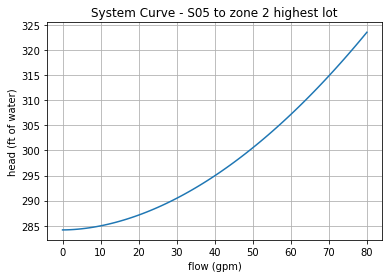

In [11]:
plt.plot(sys_x, sys_y)
plt.title('System Curve - S05 to zone 2 highest lot')
plt.xlabel('flow (gpm)')
plt.ylabel('head (ft of water)')
plt.grid()


### Pump Curve

In [12]:
# Submerssible Pump for S05 
well_pump = Pump()
well_pump.load_pump('Goulds 85GS100')
ex_pump = Pump()
ex_pump.load_pump('Grundfos 85S100-9')

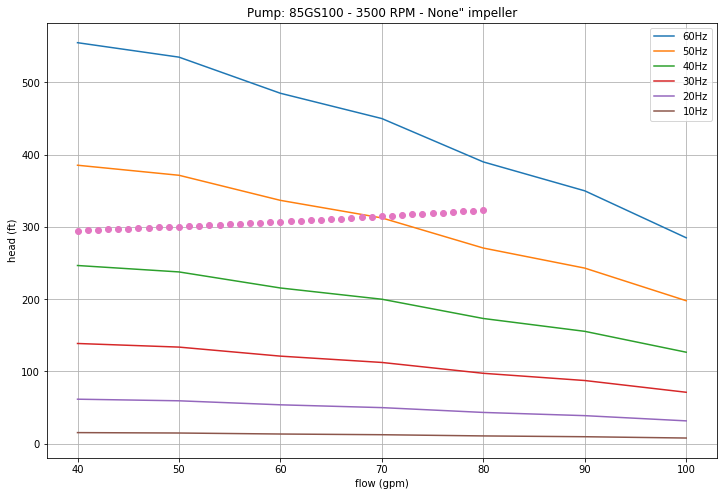

In [13]:
# plotting pump curve with VFD curves and system curve
plt.figure(figsize=(12, 8))
well_pump.plot_curve(sys_x[40:], sys_y[40:])

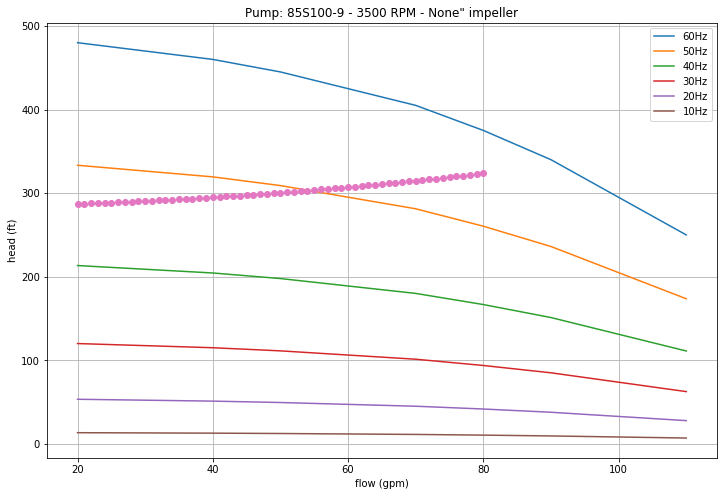

In [14]:
# plotting pump curve with VFD curves and system curve for existing pump 
plt.figure(figsize=(12, 8))
ex_pump.plot_curve(sys_x[20:], sys_y[20:])